In [29]:
import datetime as dt
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy import inf
import numpy as np

In [16]:
# importing data
df_clean_daily_returns = pd.read_csv('data/df_clean_daily_returns.csv')
df_volume_clean = pd.read_csv('data/df_volume_clean.csv')


In [18]:
# plottings daily return distribution

# removing date time index and date column
df_clean_daily_returns.reset_index(drop=True, inplace=True)
df_clean_daily_returns.drop(columns=['Date'], inplace=True)
# flattening the 2D dataframe into 1D array
flattened_returns = df_clean_daily_returns.to_numpy().flatten()

In [19]:
df_clean_daily_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
0,0.003582,-0.022890,0.000000,-0.012622,-0.008257,-0.002069,0.038066,-0.002929,-0.003620,-0.015389,...,0.000000,0.010757,-0.002922,-0.001803,-0.002714,-0.003273,0.006253,0.014328,0.000977,0.001364
1,0.019748,0.078331,0.015588,-0.027855,-0.012633,0.006682,-0.006011,0.008588,0.005522,0.010066,...,0.008234,0.012066,0.003663,0.004631,0.008661,-0.001459,0.010951,0.005097,-0.008049,0.028611
2,-0.007233,0.007468,-0.003395,-0.005882,0.002035,0.003205,0.008165,-0.009859,-0.004336,-0.004983,...,0.003062,0.003395,-0.010584,-0.011578,0.003435,-0.013153,-0.006294,0.002463,0.005655,-0.004857
3,-0.007991,0.021563,-0.016356,0.002692,-0.021764,-0.001369,0.000300,0.001358,0.005806,0.005272,...,0.006784,-0.000825,0.001844,0.006255,-0.011491,-0.012218,-0.041980,0.001445,0.000733,-0.019965
4,0.027008,-0.001979,0.003048,-0.015629,0.005636,0.000000,0.006596,0.003616,0.007071,0.013634,...,0.022911,0.003551,0.001473,-0.003843,-0.000495,0.015742,0.001777,0.018473,0.010750,-0.010865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.001476,0.011943,0.008446,-0.002798,-0.001041,0.004372,0.001389,0.008433,0.005023,0.005735,...,0.014171,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,0.001106,0.002869,0.003521
2513,0.002144,-0.014162,0.012144,-0.013878,-0.000674,-0.005941,0.003605,0.003787,-0.002931,-0.009928,...,-0.000635,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050
2514,-0.009763,-0.016760,0.001931,-0.030685,-0.004663,-0.009704,-0.006816,-0.016033,-0.008254,-0.020174,...,-0.026692,-0.050279,-0.007203,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813
2515,0.020258,0.030844,0.006951,0.028324,0.002034,-0.007827,0.022999,0.008147,0.019991,0.028173,...,0.022527,0.014609,0.007085,0.007566,0.046184,0.024784,0.005259,0.014604,0.043307,0.023139


In [20]:
# flattening the 2D dataframe into 1D array
flattened_returns = df_clean_daily_returns.to_numpy().flatten()

In [21]:
flattened_returns

array([ 0.00358163, -0.0228898 ,  0.        , ..., -0.00258157,
       -0.00434899,  0.00162995])

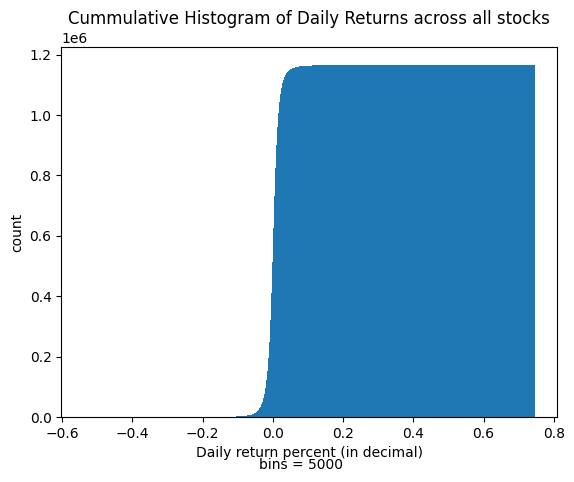

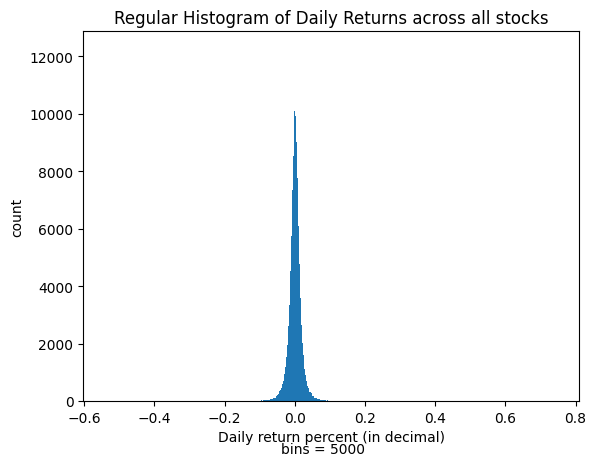

In [25]:
# Plotting cumulative histogram of daily returns across all stocks by 
bins = 5000
plt.hist(flattened_returns, bins, cumulative = True)
plt.title('Cummulative Histogram of Daily Returns across all stocks')
plt.xlabel('Daily return percent (in decimal)')
plt.ylabel('count')
plt.figtext(0.5, 0.01, f'bins = {bins}', ha='center', va='center')
plt.show()
# Plotting regular histogram of daily returns across all stocks by 
bins = 5000
plt.hist(flattened_returns, bins)
plt.title('Regular Histogram of Daily Returns across all stocks')
plt.xlabel('Daily return percent (in decimal)')
plt.ylabel('count')
plt.figtext(0.5, 0.01, f'bins = {bins}', ha='center', va='center')
plt.show()

In [30]:
np.seterr(divide='ignore')
flattened_returns[flattened_returns == -inf] = 0
log_of_abs_of_daily_returns = np.log(np.abs(flattened_returns))

ValueError: supplied range of [-inf, -0.29312024365438855] is not finite

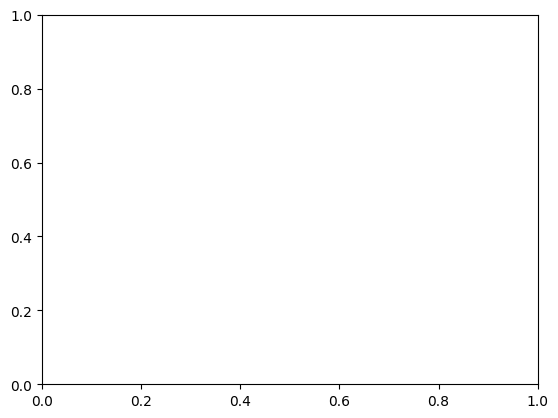

In [31]:
plt.hist(log_of_abs_of_daily_returns)